In [474]:
# ! pip install gradio

In [475]:
# 1. Data Hnadling:Effective preprocessing, handling missing values, and appropriate scaling.
# 3. Visualization: Clear and insightful visual representation using Matplotlib for feature engineering. 5-6 input params rest can be predefined
# 4. Model Implementation: Correct application of algorithms with feature engineering.
# 2. Insights and Interpretation: Thoughtful analysis and meaningful insights based on predictions and clustering.
# 5. Use gradio to create an interface

In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [477]:
df = pd.read_csv("/content/train.csv")
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [478]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [479]:
df.shape

(1460, 81)

"shows that ['Alley', 'PoolQC', 'FireplaceQu'] have too many null values so I'm dropping them.\n Since all the cols are not shown here, I'll drop all the cols with >20% null values"

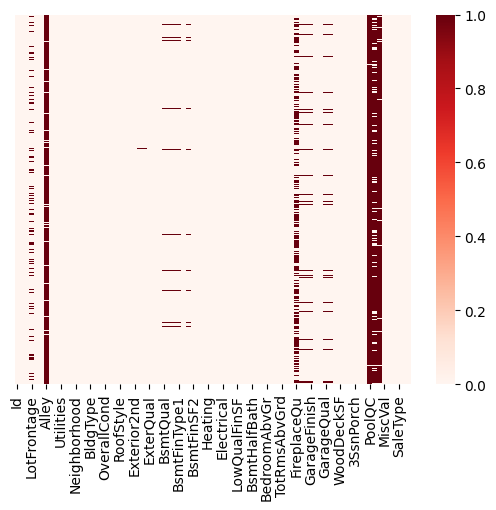

In [480]:
sns.heatmap(df.isnull(), yticklabels=False,cmap='Reds')
'''shows that ['Alley', 'PoolQC', 'FireplaceQu'] have too many null values so I'm dropping them.
 Since all the cols are not shown here, I'll drop all the cols with >20% null values'''

In [481]:
# drop_columns = df.columns[df.isnull().sum() >= 292]
drop_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
print(drop_columns)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [482]:
df.drop(drop_columns,axis=1,inplace=True)

In [483]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


***Filling missing values***

In [484]:
#Filling missing values
fill_cols = df.columns[df.isnull().sum() >= 1]
for col in fill_cols:
    print(f"'{col}' data type: {df[col].dtype}")
#I am going to fill mean values for float dtypes and mode for object dtypes

'LotFrontage' data type: float64
'MasVnrType' data type: object
'MasVnrArea' data type: float64
'BsmtQual' data type: object
'BsmtCond' data type: object
'BsmtExposure' data type: object
'BsmtFinType1' data type: object
'BsmtFinType2' data type: object
'Electrical' data type: object
'GarageType' data type: object
'GarageYrBlt' data type: float64
'GarageFinish' data type: object
'GarageQual' data type: object
'GarageCond' data type: object


In [485]:
fill_with_mean = []
fill_with_mode = []
for col in fill_cols:
  if df[col].dtype == 'float64':
    fill_with_mean.append(col)
  else:
    fill_with_mode.append(col)

In [486]:
print(fill_with_mode)
print(fill_with_mean)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [487]:
for col in fill_cols:
  if df[col].dtype == 'float64':
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [488]:
df.drop(['Id'],axis=1,inplace=True)#need to input the col coz u already specified from which df.. remember form next time

In [489]:
# def data_preprep(data):
  #dropped drop_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
  #fill_with_mode = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
  #fill_with_mean = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
  #drop id col

***Feature Selection/Modification***

In [490]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [491]:
#Dropping features whose value may be approximated using other features
drop_cols = ['Condition1', 'Condition2','HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond',
       'BsmtExposure','BsmtFinSF1','BsmtFinSF2', 'Heating','MoSold', 'SaleType','SaleCondition','Electrical','Street','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','Foundation','Functional']
df_red = df.drop(drop_cols, axis=1)

In [492]:
#For LabelEncoding:
from sklearn.preprocessing import LabelEncoder
def custom_encoder(df_red):
  category_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, 'NA':0,'Y':2,'N':0,'P':1,'Gtl':1,'Mod':2,'Sev':3}

  # Create a custom LabelEncoder
  class CustomLabelEncoder(LabelEncoder):
      def fit(self, X, y=None):
          super().fit(X)
          self.classes_ = category_mapping
          return self

  # Use the custom encoder
  encoder = CustomLabelEncoder()
  df_red['KitchenQual_encoded'] = encoder.fit_transform(df_red['KitchenQual'])
  df_red['ExterQual_encoded'] = encoder.fit_transform(df_red['ExterQual'])
  df_red['Extercond_encoded'] = encoder.fit_transform(df_red['ExterCond'])
  df_red['GarageQual_encoded'] = encoder.fit_transform(df_red['GarageQual'])
  df_red['Garagecond_encoded'] = encoder.fit_transform(df_red['GarageCond'])
  df_red['PavedDrive_encoded'] = encoder.fit_transform(df_red['PavedDrive'])
  df_red['LandSlope'] = encoder.fit_transform(df_red['LandSlope'])
  df_red['HeatingQC'] = encoder.fit_transform(df_red['HeatingQC'])
  df_red['CentralAir'] = encoder.fit_transform(df_red['CentralAir'])
custom_encoder(df_red)

In [493]:
def feature_trans(df_red):
  df_red['house_cond'] = df_red['1stFlrSF']+df_red['2ndFlrSF']-(0.5)*df_red['LowQualFinSF']+df_red['GrLivArea'] + (50)*df_red['BsmtFullBath']+ (50)*df_red['BsmtHalfBath']+ (50)*df_red['FullBath']+ (50)*df_red['HalfBath']
  + (500)*df_red['KitchenAbvGr']*df_red['KitchenQual_encoded'] + 100*df_red['TotRmsAbvGrd']
  + 100*df_red['Fireplaces'] + df_red['WoodDeckSF']+ df_red['OpenPorchSF']+ df_red['EnclosedPorch']+ df_red['3SsnPorch'] +df_red['ScreenPorch']+ df_red['PoolArea'] + df_red['MiscVal'] + df_red['LotArea'] + 10*df_red['LotFrontage'] + 100*(df_red['OverallQual']+df_red['OverallCond']+df_red['ExterQual_encoded']+df_red['Extercond_encoded']+df_red['CentralAir']+df_red['HeatingQC']) + df_red['TotalBsmtSF'] + df_red['GarageArea']
  df_red['Garage_cond'] = df_red['GarageQual_encoded'] + df_red['Garagecond_encoded'] + df_red['PavedDrive_encoded'] - df_red['LandSlope']
  df_red['Age'] = df_red['YrSold'] - (df_red['YearRemodAdd'] + df_red['YearBuilt'])*0.5
  df_red.drop(['LotFrontage', 'LotArea','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','Fireplaces','WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'KitchenQual_encoded','OverallQual','OverallCond','ExterQual_encoded',
  'Extercond_encoded','BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF','ExterQual', 'ExterCond', 'GarageQual',
  'GarageCond', 'GarageQual_encoded', 'Garagecond_encoded','GarageArea','PavedDrive','PavedDrive_encoded','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType','CentralAir', 'HeatingQC', 'YearBuilt', 'YearRemodAdd','YrSold'], axis=1,inplace=True)
feature_trans(df_red)

In [494]:
cat_cols_light = []
cat_cols_heavy = []
for col in df_red.columns:
  if df_red[col].dtype == 'object':
    print(f"'{col}' unique values: {df_red[col].nunique()}")
    if df_red[col].nunique() >= 6:
      cat_cols_heavy.append(col)
    else:
      cat_cols_light.append(col)

'MSZoning' unique values: 5
'Neighborhood' unique values: 25


In [495]:
print(cat_cols_heavy)
print(cat_cols_light)#Was useful when I had too many features..

['Neighborhood']
['MSZoning']


<Axes: ylabel='SalePrice'>

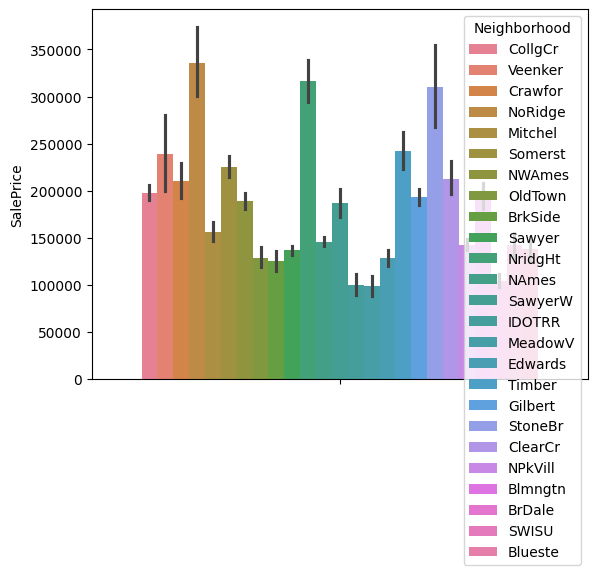

In [496]:
sns.barplot(data = df_red, y = 'SalePrice', hue='Neighborhood')

<Axes: ylabel='SalePrice'>

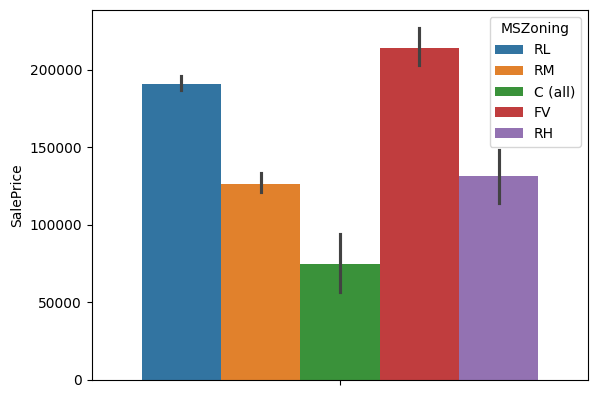

In [497]:
sns.barplot(data = df_red, y = 'SalePrice', hue='MSZoning')

In [498]:
mean_values = {}
for col in df_red[['Neighborhood','MSZoning']]:
    mean_values[col] = df_red.groupby(col)['SalePrice'].mean().to_dict()
def feature_encoder(df_red):
  df_red["NHB_encoded"] = df_red.groupby("Neighborhood")["SalePrice"].transform("mean")
  df_red["MSZ_encoded"] = df_red.groupby("MSZoning")["SalePrice"].transform("mean")
  df_red.drop(['Neighborhood','MSZoning'], axis=1,inplace=True)



In [499]:
print(mean_values)

{'Neighborhood': {'Blmngtn': 194870.88235294117, 'Blueste': 137500.0, 'BrDale': 104493.75, 'BrkSide': 124834.05172413793, 'ClearCr': 212565.42857142858, 'CollgCr': 197965.77333333335, 'Crawfor': 210624.72549019608, 'Edwards': 128219.7, 'Gilbert': 192854.50632911394, 'IDOTRR': 100123.78378378379, 'MeadowV': 98576.4705882353, 'Mitchel': 156270.1224489796, 'NAmes': 145847.08, 'NPkVill': 142694.44444444444, 'NWAmes': 189050.0684931507, 'NoRidge': 335295.31707317074, 'NridgHt': 316270.6233766234, 'OldTown': 128225.30088495575, 'SWISU': 142591.36, 'Sawyer': 136793.13513513515, 'SawyerW': 186555.7966101695, 'Somerst': 225379.83720930232, 'StoneBr': 310499.0, 'Timber': 242247.44736842104, 'Veenker': 238772.72727272726}, 'MSZoning': {'C (all)': 74528.0, 'FV': 214014.06153846154, 'RH': 131558.375, 'RL': 191004.99478714162, 'RM': 126316.83027522935}}


In [500]:
feature_encoder(df_red)

In [501]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

***Preprocessing Train and Test Data***

In [502]:
scaler = StandardScaler()
X_train = df_red.drop('SalePrice', axis=1)
Y_train = df_red['SalePrice']
X_train[['MSSubClass', 'house_cond', 'Garage_cond', 'Age','NHB_encoded', 'MSZ_encoded']] = scaler.fit_transform(df_red[['MSSubClass','house_cond', 'Garage_cond', 'Age','NHB_encoded', 'MSZ_encoded']])

In [503]:
X_test = test.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','Id'], axis=1)

In [504]:
fill_cols = X_test.columns[X_test.isnull().sum() >= 1]
for col in fill_cols:
  if X_test[col].dtype == 'float64':
    X_test[col] = X_test[col].fillna(X_test[col].mean())
  else:
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])
drop_cols = ['Condition1', 'Condition2','HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea','BsmtQual', 'BsmtCond',
       'BsmtExposure','BsmtFinSF1','BsmtFinSF2', 'Heating','MoSold', 'SaleType','SaleCondition','Electrical','Street','GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars','Foundation','Functional']
X_test = X_test.drop(drop_cols, axis=1)
custom_encoder(X_test)
feature_trans(X_test)
for col in X_test[['Neighborhood','MSZoning']]:
    X_test[col] = X_test[col].apply(lambda x: mean_values[col].get(x, x))  # Use get() to handle missing values


In [505]:
X_test[['NHB_encoded','MSZ_encoded']] = X_test[['Neighborhood','MSZoning']]

In [506]:
X_test[['MSSubClass', 'house_cond', 'Garage_cond', 'Age','NHB_encoded', 'MSZ_encoded']] = scaler.fit_transform(X_test[['MSSubClass','house_cond', 'Garage_cond', 'Age','NHB_encoded', 'MSZ_encoded']])

In [507]:
X_test.drop(['Neighborhood','MSZoning'], axis=1,inplace=True)
X_test.head()

,MSSubClass,house_cond,Garage_cond,Age,NHB_encoded,MSZ_encoded
0,-0.874711,-1.245852,0.386027,0.801821,-0.558681,-1.751357
1,-0.874711,-0.330834,0.386027,0.930177,-0.558681,0.405112
2,0.061351,0.318469,0.386027,-0.759842,0.233917,0.405112
3,0.061351,0.268523,0.386027,-0.781235,0.233917,0.405112
4,1.465443,-0.428729,0.386027,-0.524523,2.217536,0.405112


***Model***

In [508]:
model = KNeighborsRegressor(5)
model.fit(X_train,Y_train)

KNeighborsRegressor()

***Predictions***

In [509]:
y_pred = model.predict(X_test)
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('/content/sample_submission.csv')
datasets=pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv("Sample_submission.csv", index=False)